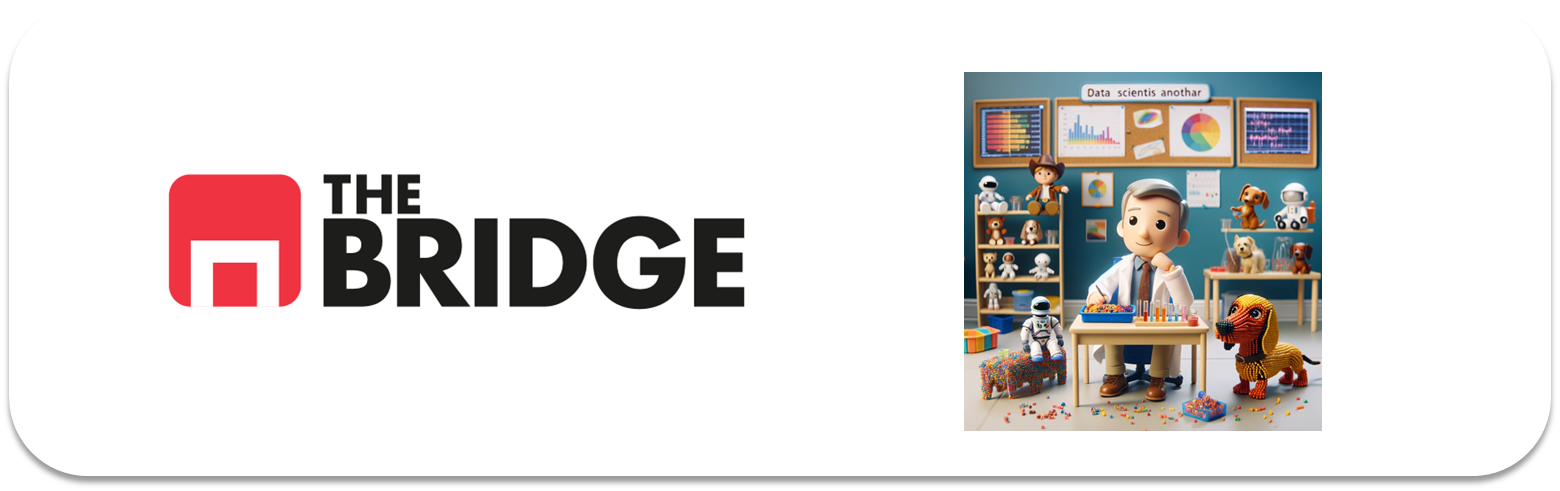

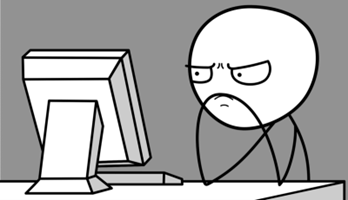

Para ejercitarte y afianzar lo aprendido sobre dispersión, distribución y outliers, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/car_crashes.csv", muestra un parte de su contenido y la info general del mismo

In [2]:
df = pd.read_csv("./data/car_crashes.csv", sep = "|", index_col=0)
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.6+ KB


### Ejercicio 2

Haz una pequeña descripción de lo que crees que puede representar cada una de las variables y de que puede representar el dataset. Aunque para algunas se proporciona aquí:

* "total" - Número de accidentes fatales por colisión de vehiculos por mil millones de millas
* "ins_premiums" - Prima media de Seguros de Automóviles ($)
* "ins_losses" - Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)

**ACLARACION IMPORTANTE**: El resto de columnas están dadas en las mismas unidades que total (numero de accidentes fatales por mil millones de millas)

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Col1:total|Número de accidentes fatales por colisión de vehiculos por mil millones de millas|Numerica Continua||||
|Col2:speeding|Número de accidentes debidos a alta velocidad - por mil millones de millas|Numerica Continua||||
|Col3:alcohol|Número de accidentes debidos a consumo excesivo de alcohol - por mil millones de millas|Numerica Continua||||
|Col4:not-distracted|Número de accidentes no debido a distraciones - por mil millones de millas|Numerica Continua||||
|Col5:no-previous|Número de accidentes no causados por si mismo - por mil millones de millas|Numerica Continua||||
|Col6:ins_premiums|Prima media de Seguros de Automóviles ($)|Numerica Continua||||
|Col7:ins_losses|Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)|Numerica Continua||||
|Col8:abbrev|Codigo seguro contratado|||||


### Ejercicio 3

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.  

**IMPORTANTE**:
*Al ser los valores porcentajes, tenemos que convertirlos a valores absolutos (multiplicar los valores de las columnas de cada fila por el total de esa fila, excepto total) si queremos poder contabilizar medias reales entre todos los estados*  


In [4]:
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [5]:
percentage_columns = ["speeding", "alcohol", "not_distracted", "no_previous"]
for col in percentage_columns:
    df[col] = round((df[col] * df["total"] / 100),3)

# conversion de los valores percentuales en absolutos
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,1.378,1.060,3.393,2.828,784.55,145.08,AL
1,18.1,1.343,0.819,2.948,3.080,1053.48,133.93,AK
2,18.6,1.211,0.969,2.906,3.321,899.47,110.35,AZ
3,22.4,0.903,1.305,4.717,4.767,827.34,142.39,AR
4,12.0,0.504,0.403,1.310,1.282,878.41,165.63,CA


In [6]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,0.839137,0.831157,2.294039,2.356804,886.957647,134.493137
std,4.122002,0.490597,0.495108,1.291097,1.165130,178.296285,24.835922
min,5.900000,0.118000,0.094000,0.310000,0.348000,641.960000,82.750000
25%,12.750000,0.480500,0.484000,1.240500,1.503000,768.430000,114.645000
50%,15.600000,0.684000,0.691000,2.065000,2.177000,858.970000,136.050000
75%,18.500000,1.189000,1.040000,3.008000,3.089000,1007.945000,151.870000
max,23.900000,2.171000,2.399000,5.655000,4.928000,1301.520000,194.780000


### Ejercicio 4

¿Qué puedes decir de la variable abbrev?¿Qué crees que podríamos hacer con ella?¿Le cambiarías el nombre?

Nota: Para los siguientes ejercicios te convendrá hacerte una función que obtenga el CV (Coeficiente de variación), y guardárla para el futuro

In [7]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean","25%","50%","75%","min","max"]].T
    #llamo al describe y 
    # creo una nueva columna con el coef de Variacion =std/mean
    df_var["Coef_Var"] = df_var["std"]/df_var["mean"]
    return df_var

In [8]:
variabilidad(df)

,std,mean,25%,50%,75%,min,max,Coef_Var
total,4.122002,15.790196,12.7500,15.600,18.500,5.900,23.900,0.261048
speeding,0.490597,0.839137,0.4805,0.684,1.189,0.118,2.171,0.584644
alcohol,0.495108,0.831157,0.4840,0.691,1.040,0.094,2.399,0.595686
not_distracted,1.291097,2.294039,1.2405,2.065,3.008,0.310,5.655,0.562805
no_previous,1.165130,2.356804,1.5030,2.177,3.089,0.348,4.928,0.494369
ins_premium,178.296285,886.957647,768.4300,858.970,1007.945,641.960,1301.520,0.201020
ins_losses,24.835922,134.493137,114.6450,136.050,151.870,82.750,194.780,0.184663


### Ejercicio 5

Analiza `speeding` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [9]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()



(2,)


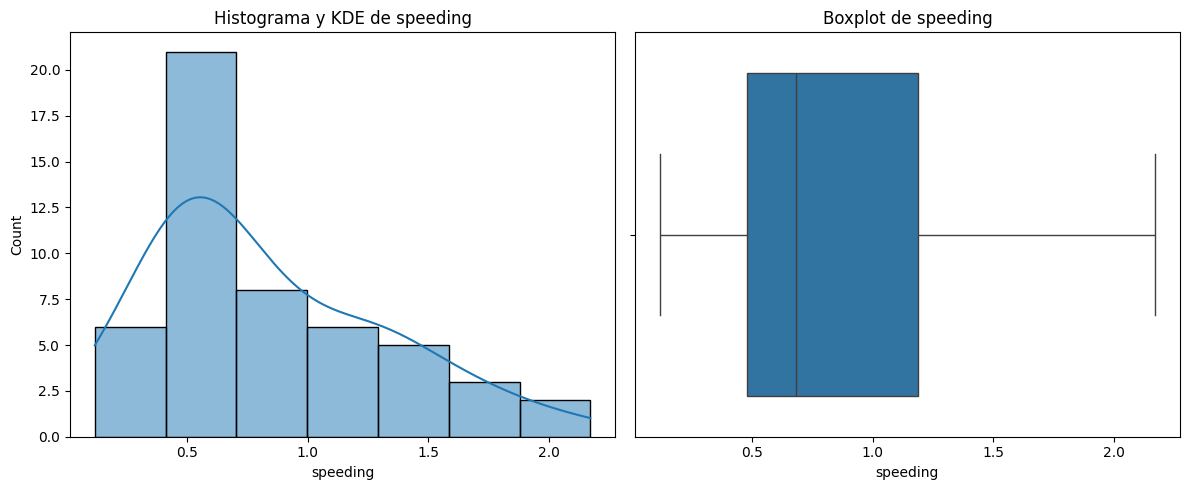

In [10]:
plot_combined_graphs(df, ["speeding"])

Speeding:
- tiene una distribucion logaritmica normal, con un pico de concentracion en la segunda franja de datos
- no presenta outliers
- està bastante concentrada 

### Ejercicio 6

Analiza `alcohol` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


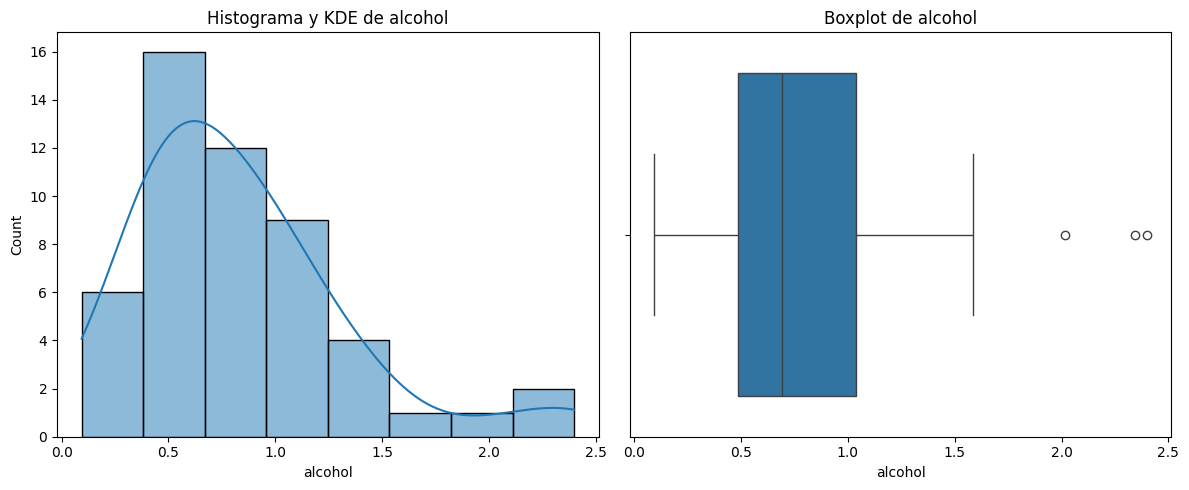

In [11]:
plot_combined_graphs(df, ["alcohol"])

Acohol:
- tiene una distribucion logaritmica normal
- presenta outliers de valores superiores
- està bastante concentrada 

### Ejercicio 7

Analiza `not_distracted` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


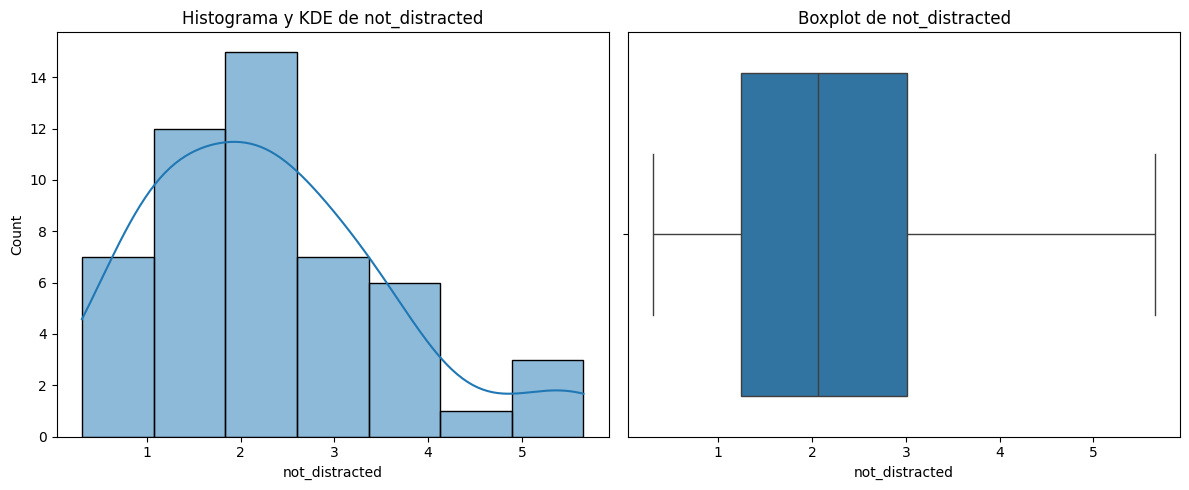

In [12]:
plot_combined_graphs(df, ["not_distracted"])

### Ejercicio 8

El diagrama de violín es un tipo de gráfico que no hemos usado pero que tu puedes usar para tu análisis. Combina elementos de diagrama de caja y de la estimación de la función de densidad. 

Ejecuta la siguiente celda y luego dibuja el boxplot y el histograma combinado con la función de densidad para ver qué te parece más interesante. Usa `plot_combined_graphs`)

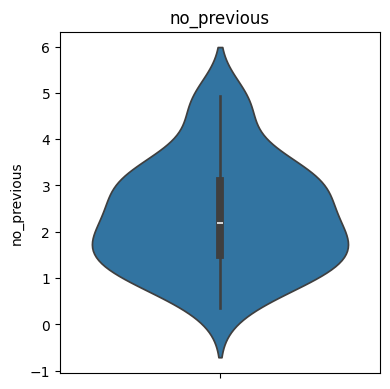

In [13]:
from bootcampviztools import mostrar_diagramas_violin

mostrar_diagramas_violin(df, ["no_previous"])

La figura presenta un plotbox interno con la mediana marcada con una línea gruesa y el rango intercuartílico dibujado en el centro, además de que la forma se lo da la función densidad estimada (replicada simétricamente):

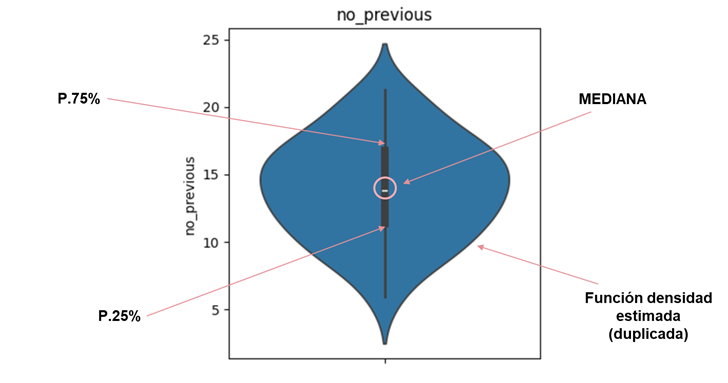

### Ejercicio 9

Completa el análisis de "no_previous" con su CV y sus medidas de tendencia central. ¿Qué destacarías? (considera gráficas y medidas obtenidas en este apartado)

(2,)


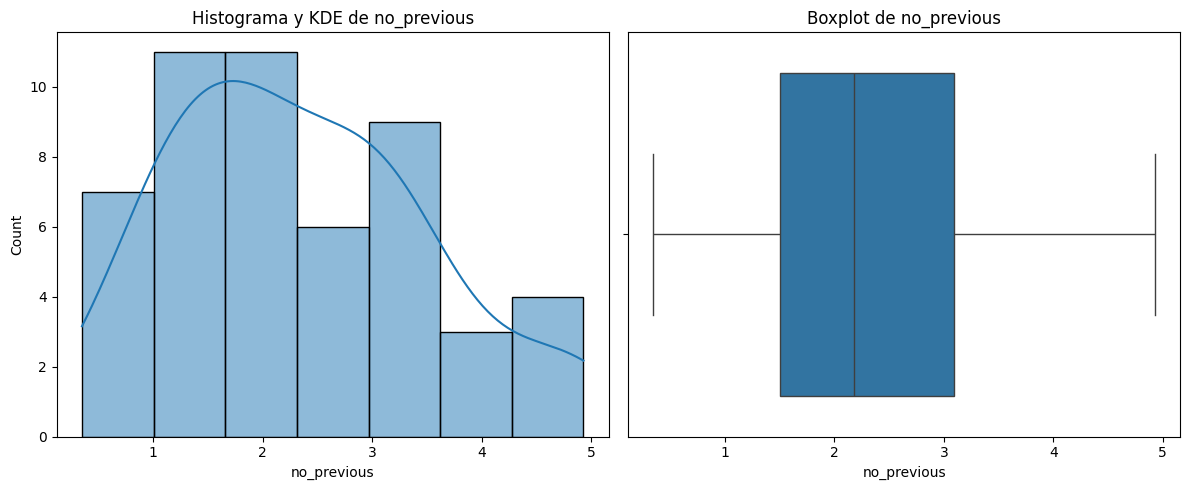

In [14]:
plot_combined_graphs(df, ["no_previous"])

### Ejercicio 10

Carga el dataset de los seguros ("./data/Marketing-Customer-Analysis.csv") en un datafame y pinta la gráfica de caja y el histograma de "customer_lifetime_value"

In [15]:
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_seguros

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


(2,)


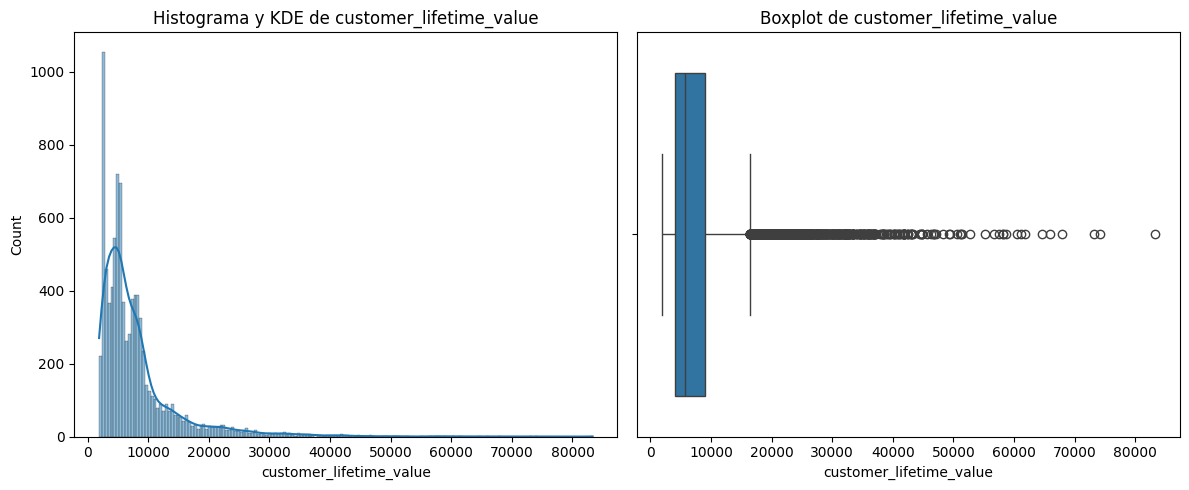

In [16]:
plot_combined_graphs(df_seguros, ["customer_lifetime_value"])

### Ejercicio 11

Para "customer_lifetime_value", escoge un umbral para marcar como outliers los valores que lo superen. Divide el dataframe en dos usando ese valor.

In [17]:
IQR = df_seguros.describe().loc["75%"]- df_seguros.describe().loc["25%"]
IQR_CLV = IQR["customer_lifetime_value"]
IQR_CLV
Q75_CLV = df_seguros.describe().loc["75%"]["customer_lifetime_value"]
Q75_CLV
#alargo un poco el bigote y escojo como umbral el valor que corresponde a 
# Q75% + 4.5*Indice intercuantilico
umbral_outlieurs= Q75_CLV + 4.5*IQR_CLV
umbral_outlieurs


np.float64(31317.785652750004)

In [21]:
df_seguros.sort_values("customer_lifetime_value", inplace=True)
df_seguros.head()
df_seguros_outliers = df_seguros[umbral_outlieurs,:]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
6037,UM17151,California,1898.007675,No,Basic,Bachelor,2/26/11,Unemployed,M,0,...,91,3,1,Personal Auto,Personal L2,Offer1,Agent,413.606733,Two-Door Car,Medsize
2210,CI68869,Arizona,1898.683686,No,Basic,College,1/8/11,Unemployed,F,0,...,20,5,1,Personal Auto,Personal L3,Offer3,Agent,702.020904,Two-Door Car,Small
2771,XT54610,California,1904.000852,No,Basic,Bachelor,1/14/11,Unemployed,F,0,...,7,3,1,Personal Auto,Personal L1,Offer1,Agent,302.400000,Four-Door Car,Medsize
7083,EH70612,California,1918.119700,No,Basic,College,2/15/11,Unemployed,M,0,...,54,2,1,Personal Auto,Personal L1,Offer1,Branch,439.200000,Two-Door Car,Small
6711,XI84293,Oregon,1940.981221,No,Basic,High School or Below,2/7/11,Unemployed,M,0,...,40,3,1,Personal Auto,Personal L3,Offer3,Call Center,475.200000,Two-Door Car,Large


In [25]:
df_seguros["customer_lifetime_value"] >= umbral_outlieurs

#df_seguros_outliers = df_seguros[31317.785652750004,:]

6037    False
2210    False
2771    False
7083    False
6711    False
        ...  
5279     True
7283     True
6252     True
1974     True
5716     True
Name: customer_lifetime_value, Length: 9134, dtype: bool

### Ejericicio 12

Compara los histogramas para "customer_lifetime_value" de cada dataframe. ¿Qué conclusiones sacas?